In [6]:

import numpy as np
import os
import tensorflow as tf

try:
    import urllib2
except ImportError:
    import urllib.request as urllib

from datasets import imagenet
from pretrained_OI.slim.nets import vgg, resnet_v1
from pretrained_OI.slim.preprocessing import vgg_preprocessing

from tensorflow.contrib import slim
import matplotlib.pyplot as plt

INFO:tensorflow:Restoring parameters from pretrained_OI/oidv2-resnet_v1_101.ckpt


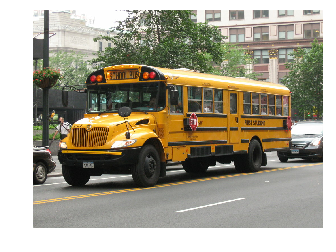

KeyError: 3527

In [7]:
image_size = vgg.vgg_16.default_image_size

with tf.Graph().as_default():
    url = 'https://upload.wikimedia.org/wikipedia/commons/d/d9/First_Student_IC_school_bus_202076.jpg'
    image_string = urllib.urlopen(url).read()
    image = tf.image.decode_jpeg(image_string, channels=3)
    processed_image = vgg_preprocessing.preprocess_image(image, image_size, image_size, is_training=False)
    processed_images  = tf.expand_dims(processed_image, 0)
    
    # Create the model, use the default arg scope to configure the batch norm parameters.
    with slim.arg_scope(resnet_v1.resnet_arg_scope()):
        # 1000 classes instead of 1001.
        logits, _ = resnet_v1.resnet_v1_101(processed_images, num_classes=5000, is_training=False)
    probabilities = tf.nn.softmax(logits)
    variables_to_restore=slim.get_variables_to_restore(include=["resnet_v1_101"])
#     init_fn = slim.assign_from_checkpoint_fn(
#         os.path.join('pretrained_OI', 'oidv2-resnet_v1_101.ckpt'),
#         slim.get_model_variables('resnet_v1_101'))
    init_fn = slim.assign_from_checkpoint_fn(
        os.path.join('pretrained_OI', 'oidv2-resnet_v1_101.ckpt'),
        variables_to_restore)
    
    with tf.Session() as sess:
        init_fn(sess)
        np_image, probabilities = sess.run([image, probabilities])
        probabilities = probabilities[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-probabilities), key=lambda x:x[1])]
        
    plt.figure()
    plt.imshow(np_image.astype(np.uint8))
    plt.axis('off')
    plt.show()
    
    names = imagenet.create_readable_names_for_imagenet_labels()
    for i in range(5):
        index = sorted_inds[i]
        # Shift the index of a class name by one. 
        print('Probability %0.2f%% => [%s]' % (probabilities[index] * 100, names[index+1]))

{0: 'background',
 1: 'tench, Tinca tinca',
 2: 'goldfish, Carassius auratus',
 3: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 4: 'tiger shark, Galeocerdo cuvieri',
 5: 'hammerhead, hammerhead shark',
 6: 'electric ray, crampfish, numbfish, torpedo',
 7: 'stingray',
 8: 'cock',
 9: 'hen',
 10: 'ostrich, Struthio camelus',
 11: 'brambling, Fringilla montifringilla',
 12: 'goldfinch, Carduelis carduelis',
 13: 'house finch, linnet, Carpodacus mexicanus',
 14: 'junco, snowbird',
 15: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 16: 'robin, American robin, Turdus migratorius',
 17: 'bulbul',
 18: 'jay',
 19: 'magpie',
 20: 'chickadee',
 21: 'water ouzel, dipper',
 22: 'kite',
 23: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 24: 'vulture',
 25: 'great grey owl, great gray owl, Strix nebulosa',
 26: 'European fire salamander, Salamandra salamandra',
 27: 'common newt, Triturus vulgaris',
 28: 'eft',
 29: 'spotted sal